<table align="left" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>Hotel Booking Cancellation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' features various classification, regression and clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

In [2]:
# the path for reading the data file
# Note: Set your path accordingly
#os.chdir('/Users/Dippies/GL DSE Deliveries/Regression/Nov 22')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

## 2. Read Data

In [3]:
df = pd.read_csv('H1.csv')
df.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.000000,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.000000,0,1,Check-Out,2015-07-03
5,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.000000,0,1,Check-Out,2015-07-03
6,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NULL,NULL,0,Transient,107.000000,0,0,Check-Out,2015-07-03
7,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,NULL,0,Transient,103.000000,0,1,Check-Out,2015-07-03
8,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,82.000000,0,1,Canceled,2015-05-06
9,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,NULL,0,Transient,105.500000,0,0,Canceled,2015-04-22


In [4]:
df.shape

(40060, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
IsCanceled                     40060 non-null int64
LeadTime                       40060 non-null int64
ArrivalDateYear                40060 non-null int64
ArrivalDateMonth               40060 non-null object
ArrivalDateWeekNumber          40060 non-null int64
ArrivalDateDayOfMonth          40060 non-null int64
StaysInWeekendNights           40060 non-null int64
StaysInWeekNights              40060 non-null int64
Adults                         40060 non-null int64
Children                       40060 non-null int64
Babies                         40060 non-null int64
Meal                           40060 non-null object
Country                        39596 non-null object
MarketSegment                  40060 non-null object
DistributionChannel            40060 non-null object
IsRepeatedGuest                40060 non-null int64
PreviousCancellations          40060 non-null int64
Pr

In [6]:
df.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [8]:
categ_col = df.select_dtypes('object').columns.tolist()

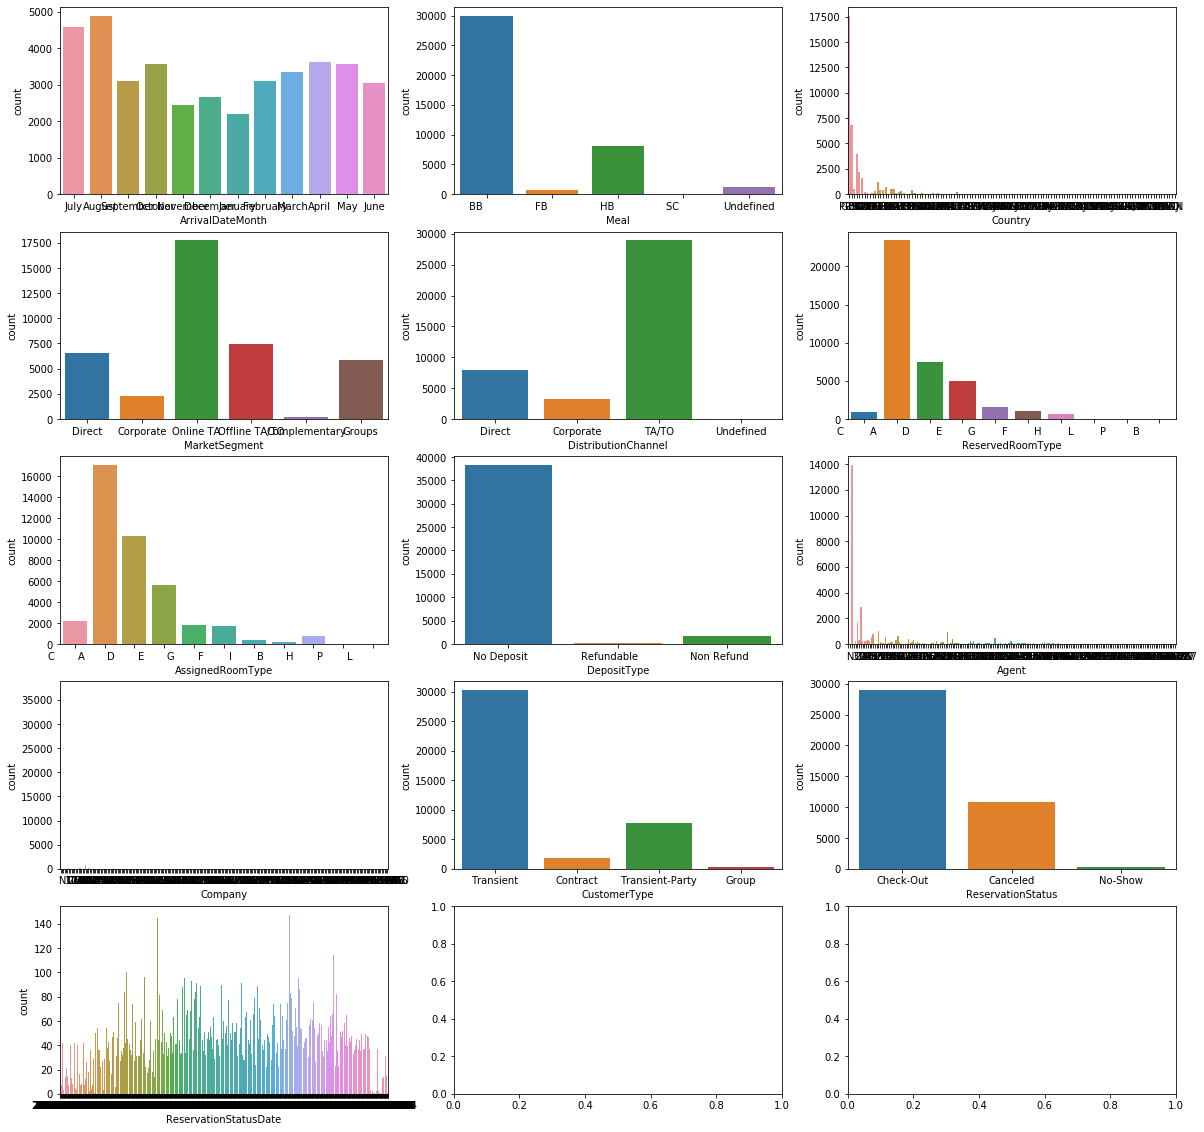

In [9]:
fig, ax = plt.subplots(5,3,figsize=(20,20))
for i, j in zip(categ_col,ax.flatten()):
    sns.countplot(df[i],ax=j)
plt.show()

In [10]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.619770
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.813930
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.000000


In [11]:
df.describe(include='object')

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus,ReservationStatusDate
count,40060,40060,39596,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060
unique,12,5,125,6,4,10,11,3,186,236,4,3,913
top,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,240,NULL,Transient,Check-Out,2017-01-19
freq,4894,30005,17630,17729,28925,23399,17046,38199,13905,36952,30209,28938,147


In [12]:
numeric_col = df.select_dtypes(np.number).columns.tolist()

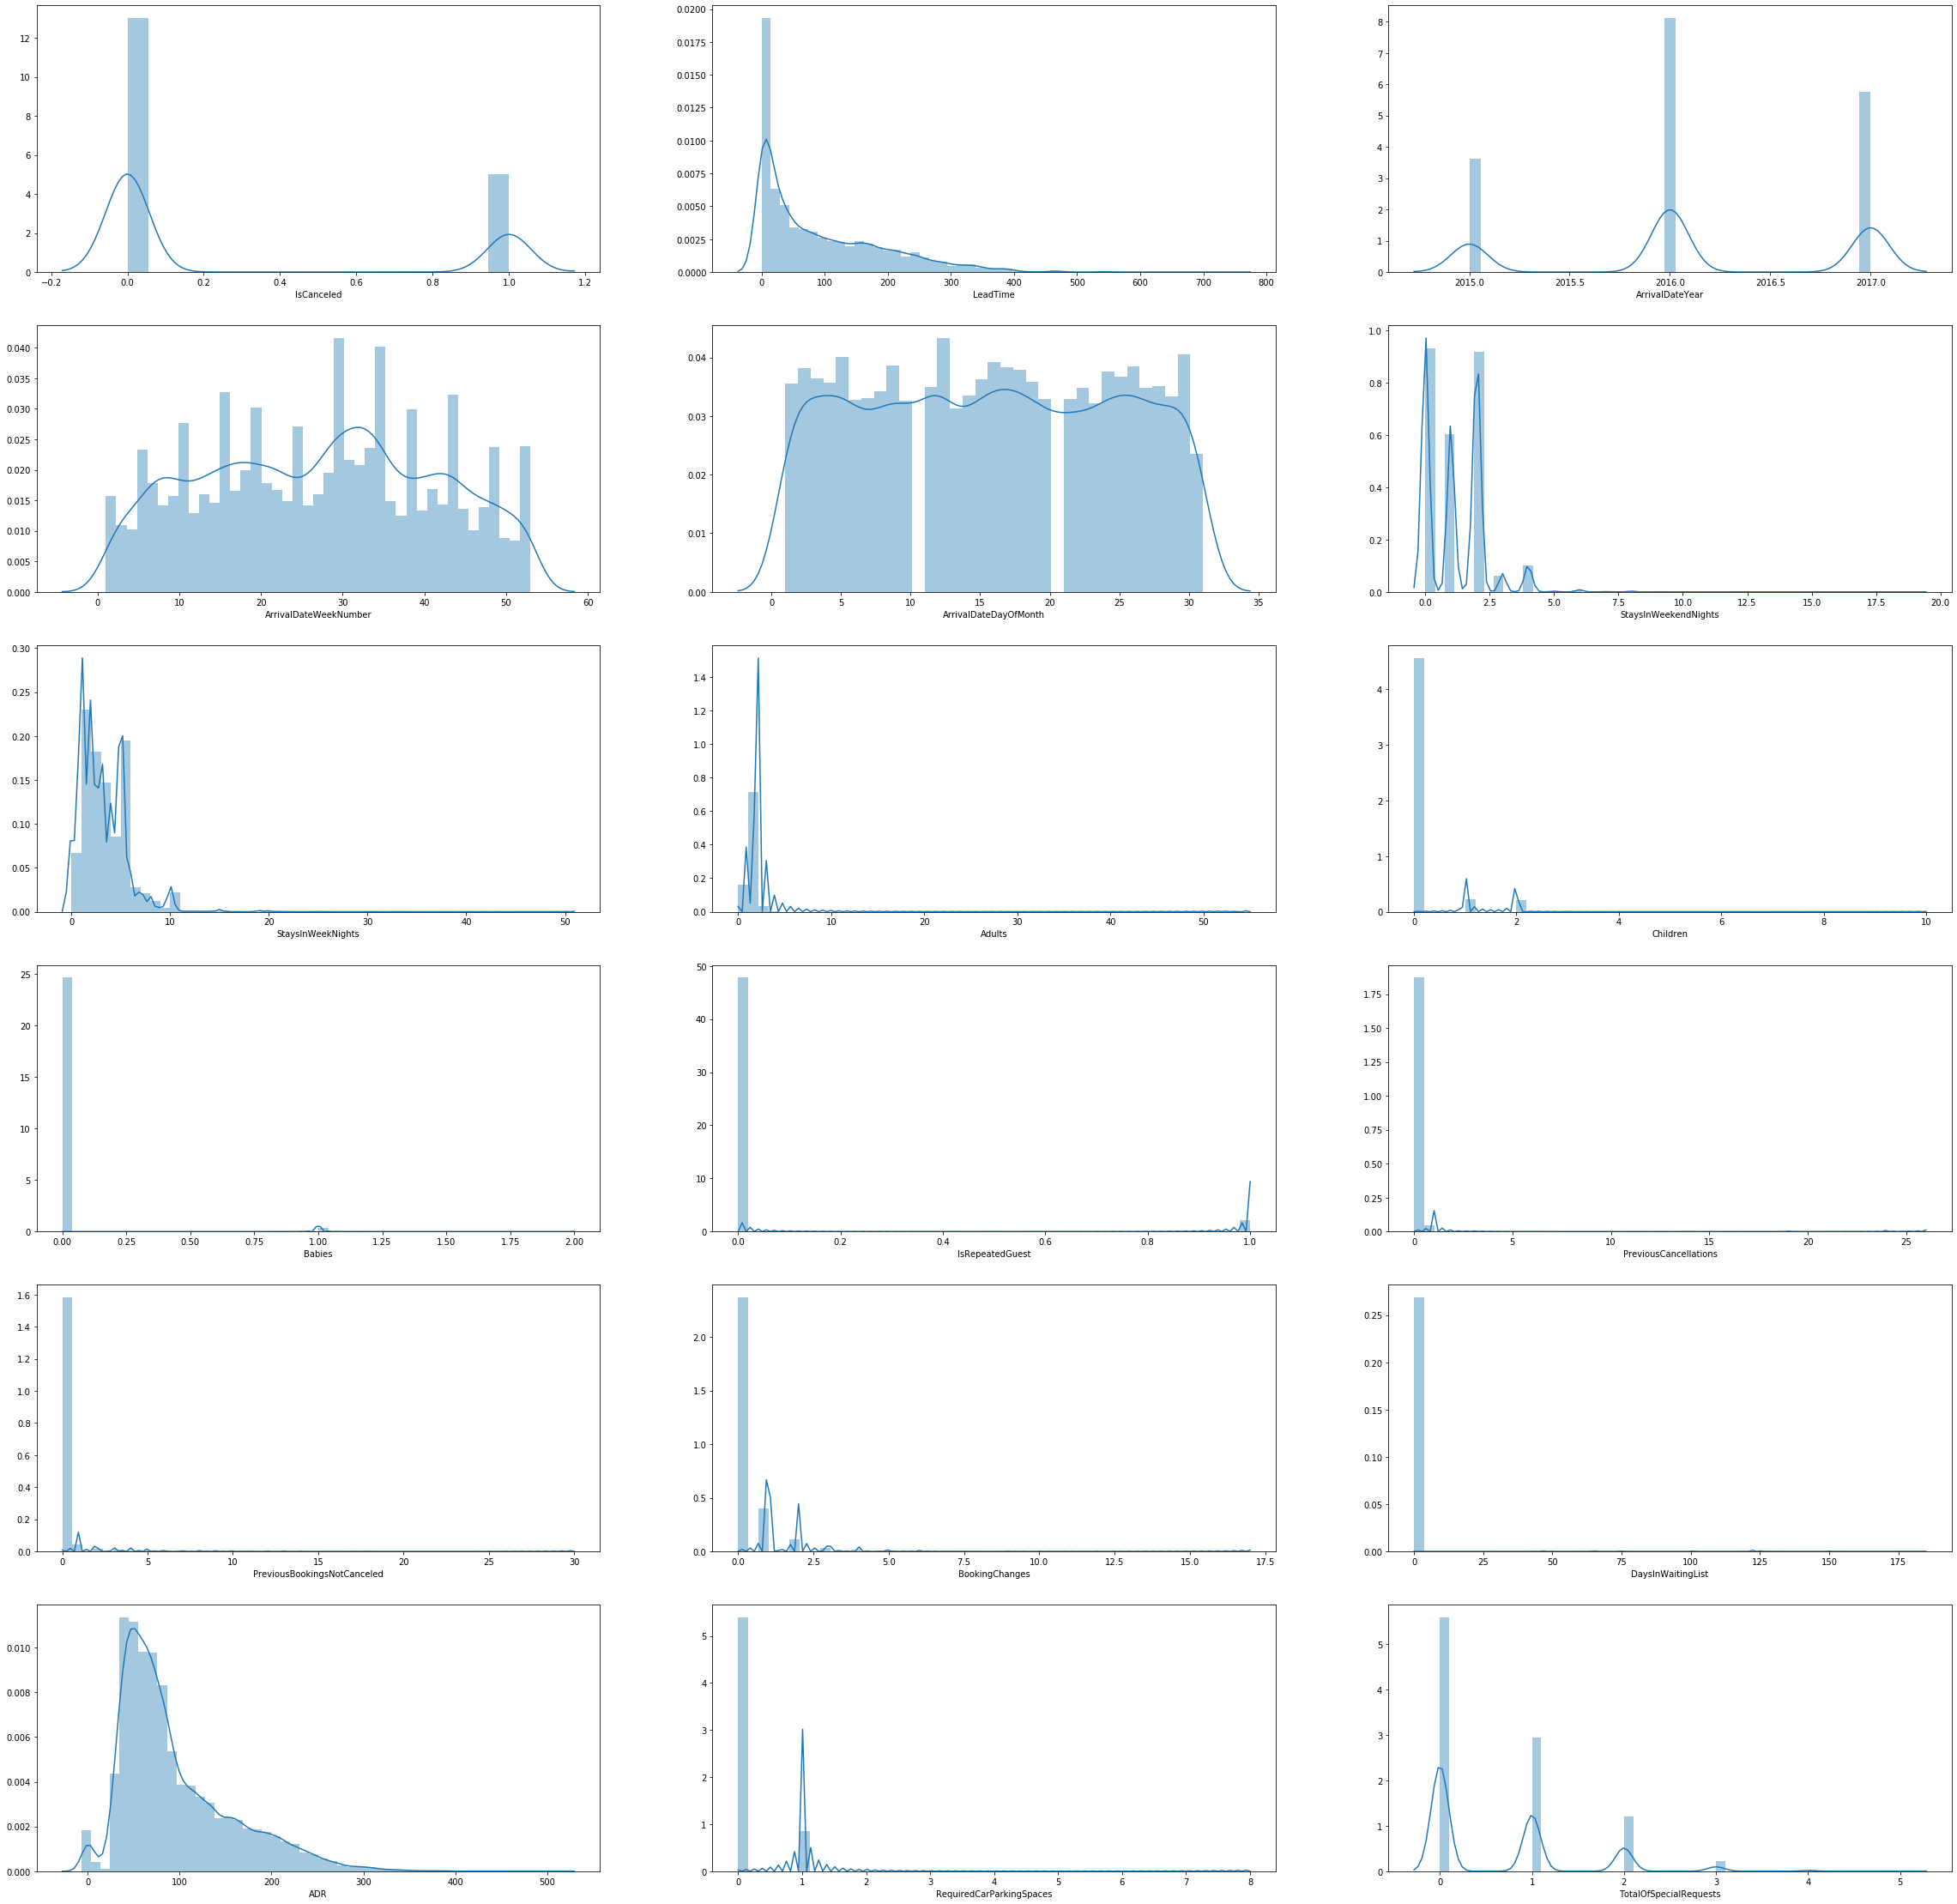

In [13]:
fig, ax = plt.subplots(6,3,figsize=(40,40))
for i, j in zip(numeric_col,ax.flatten()):
    sns.distplot(df[i],ax=j)
plt.show()

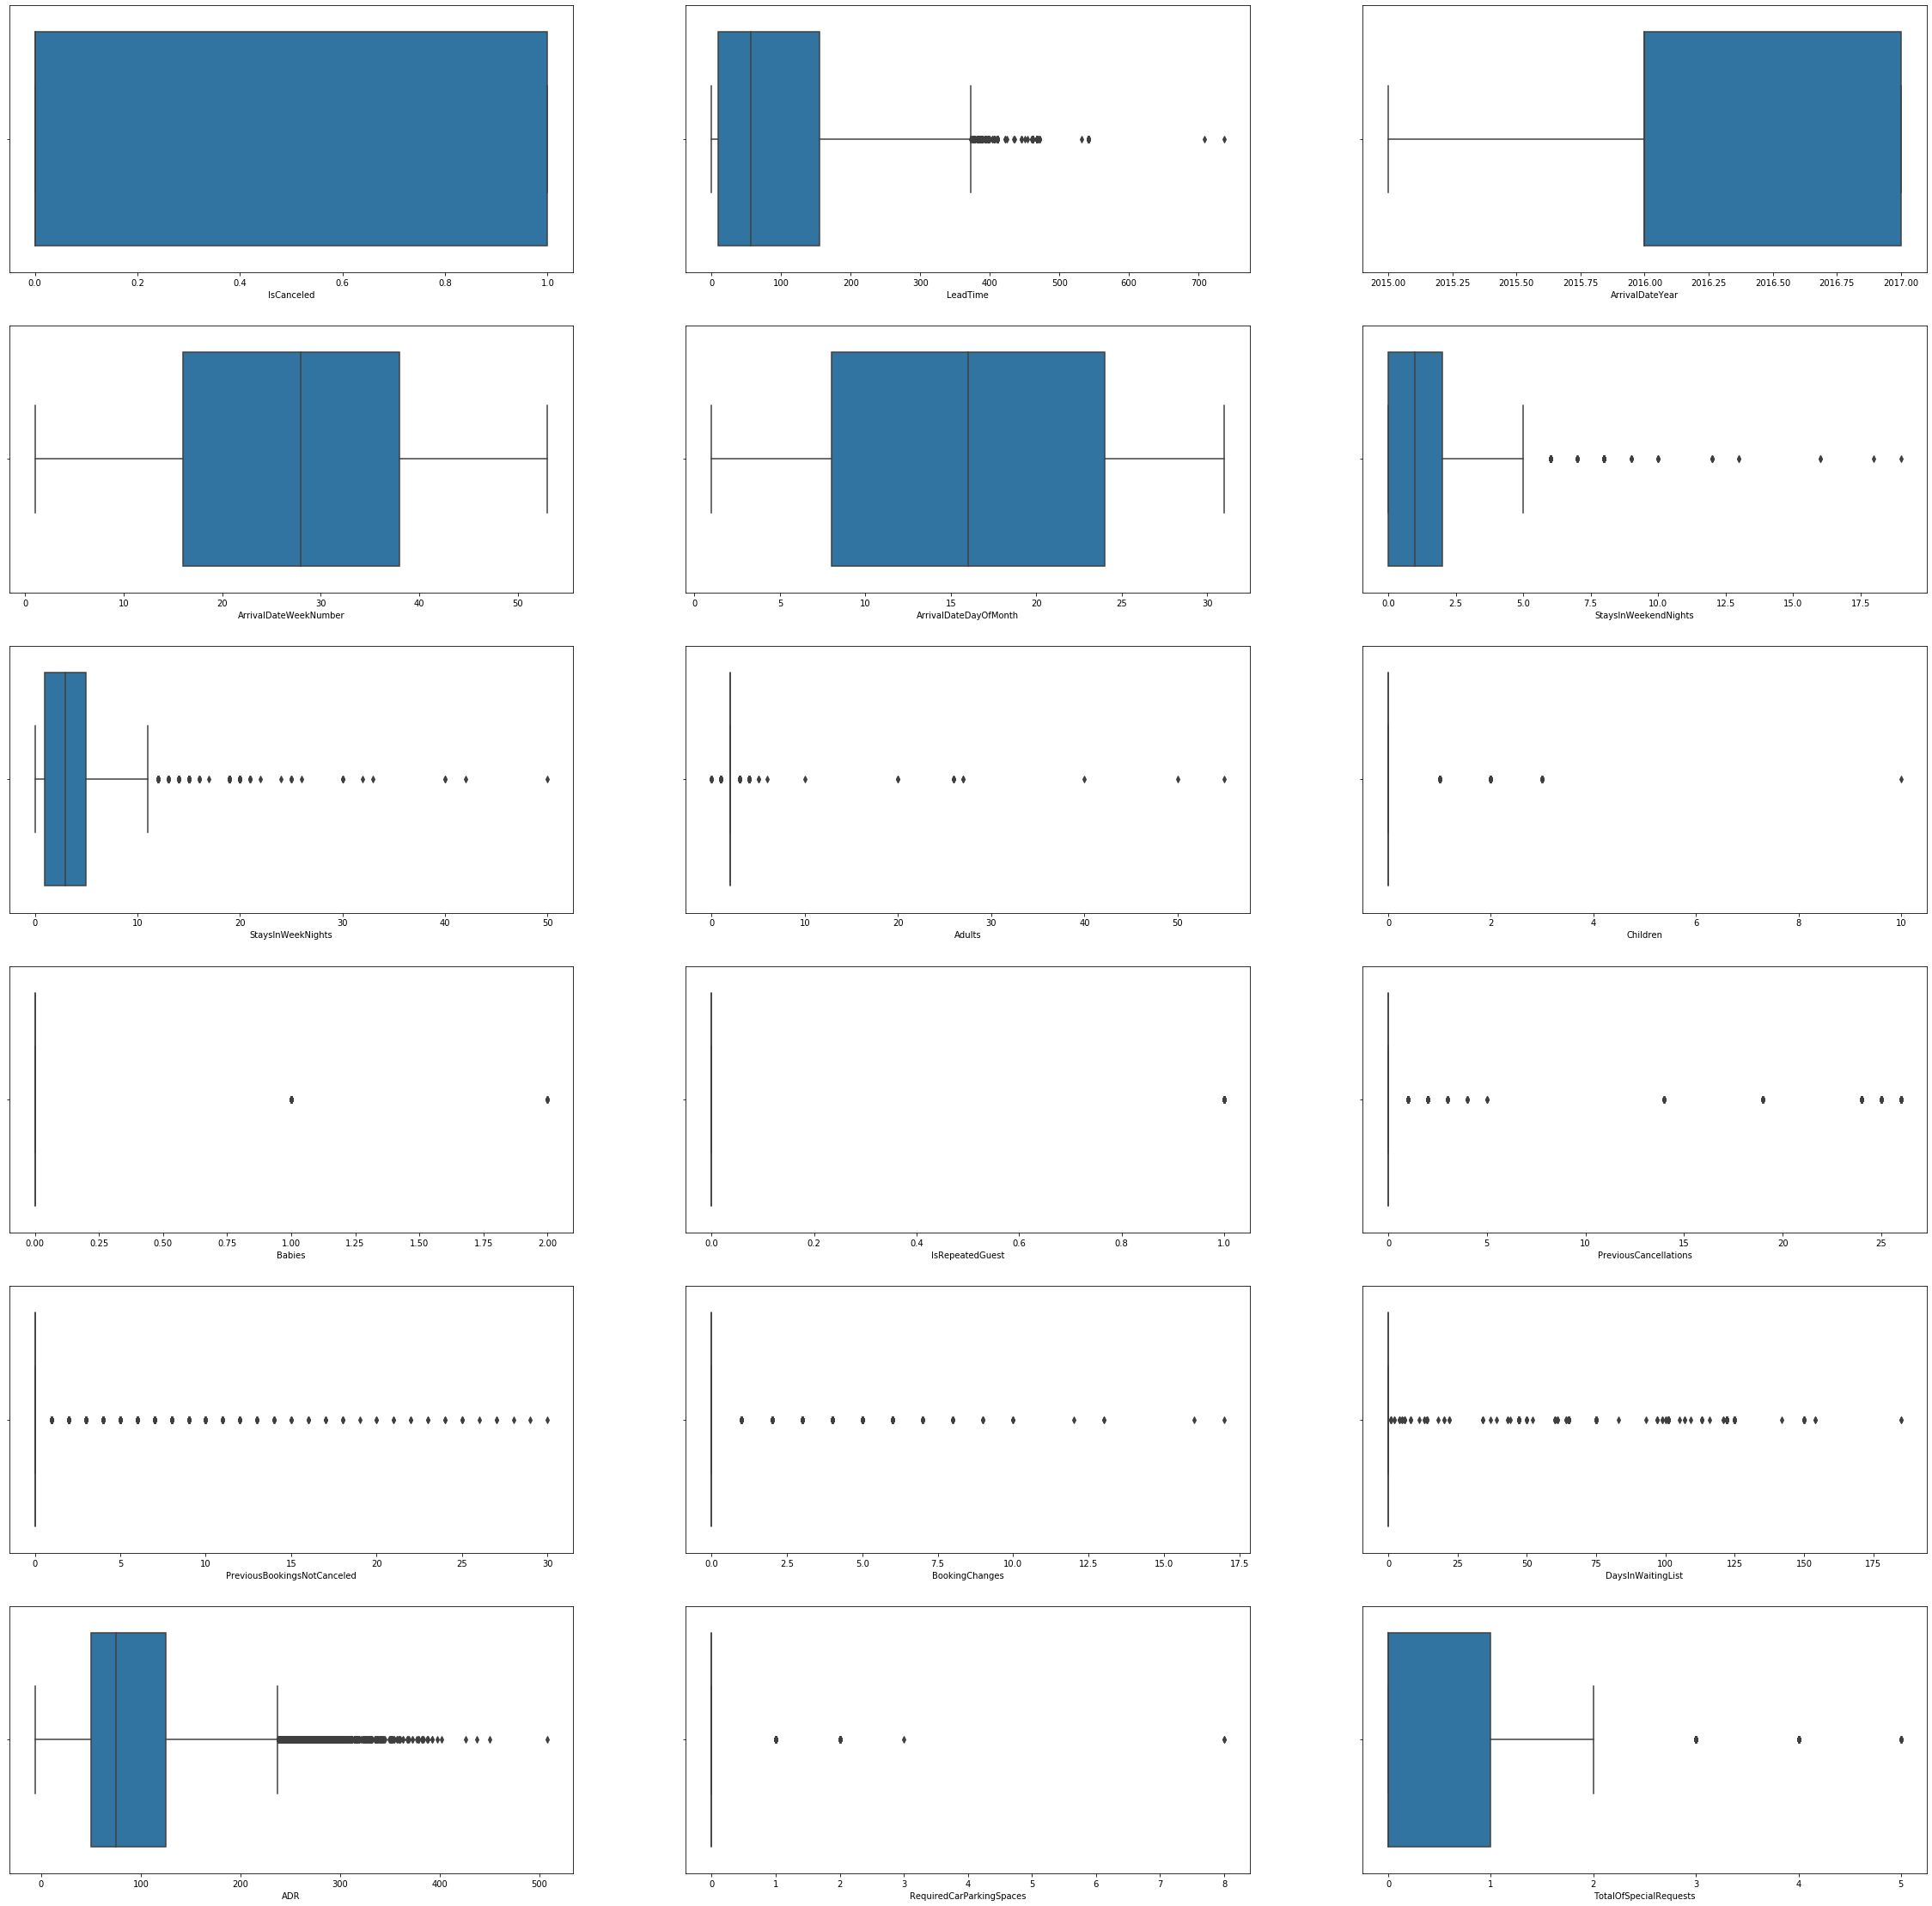

In [14]:
fig, ax = plt.subplots(6,3,figsize=(40,40))
for i, j in zip(numeric_col,ax.flatten()):
    sns.boxplot(df[i],ax=j)
plt.show()

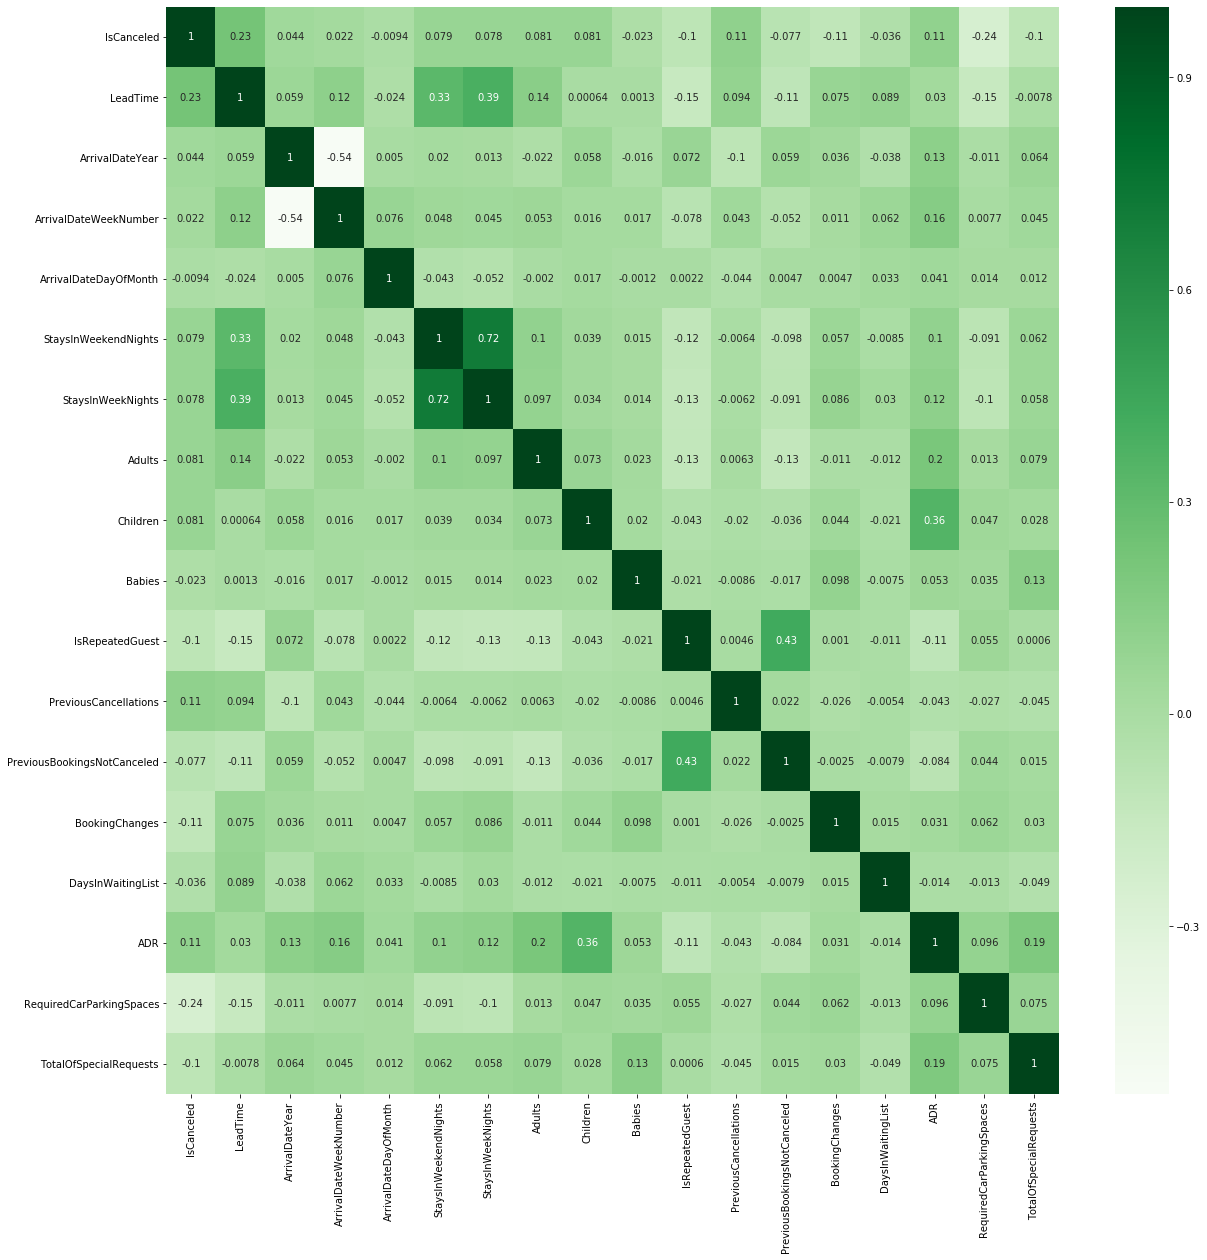

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [17]:
# calculate the first quartile
Q1 = df.quantile(0.25)

#calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)

IsCanceled                      1.000000
LeadTime                      145.000000
ArrivalDateYear                 1.000000
ArrivalDateWeekNumber          22.000000
ArrivalDateDayOfMonth          16.000000
StaysInWeekendNights            2.000000
StaysInWeekNights               4.000000
Adults                          0.000000
Children                        0.000000
Babies                          0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
BookingChanges                  0.000000
DaysInWaitingList               0.000000
ADR                            75.000000
RequiredCarParkingSpaces        0.000000
TotalOfSpecialRequests          1.000000
dtype: float64


In [18]:
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
df_outliers.shape

(21740, 31)

In [20]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

In [128]:
significant_col = []
insignificant_col = []
for i in categ_col:
    for j in categ_col:
        chisq, pval, dof, exp = stats.chi2_contingency(pd.crosstab(df[j],df[i]))
        if pval < 0.00001:
            significant_col.append((i,j))
        else:
            insignificant_col.append((i,j))
print('Significant Features:\n',significant_col)
print('\nInsignificant Features:\n',insignificant_col)

KeyError: 'DistributionChannel'

In [22]:
significant_col = []
insignificant_col = []
for i in numeric_col:    
    formula = i+' ~ IsCanceled'
    model = ols(formula,df).fit()
    ano = anova_lm(model, typ=2)
    if model.pvalues['IsCanceled']< 0.05:
        significant_col.append(i)
    else:
        insignificant_col.append(i)
for j in categ_col:
    chisq, pval, dof, exp = stats.chi2_contingency(pd.crosstab(df[j],df.IsCanceled))
    if pval < 0.05:
        significant_col.append(j)
    else:
        insignificant_col.append(j)
print('Significant Features:\n',significant_col)
print('\nInsignificant Features:\n',insignificant_col)

Significant Features:
 ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus', 'ReservationStatusDate']

Insignificant Features:
 ['ArrivalDateDayOfMonth']


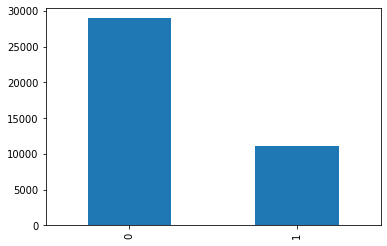

In [23]:
df.IsCanceled.value_counts().plot(kind='bar')

In [24]:
print('Percentage of class 0 (Not Canceled) :',df['IsCanceled'].value_counts()[0]*100/df.shape[0])
print('Percentage of class 1 (Canceled):',df['IsCanceled'].value_counts()[1]*100/df.shape[0])

Percentage of class 0 (Not Canceled) : 72.23664503245132
Percentage of class 1 (Canceled): 27.763354967548675


In [25]:
pd.crosstab(df['MarketSegment'],df['DistributionChannel'])

DistributionChannel,Corporate,Direct,TA/TO,Undefined
MarketSegment,,,,
Complementary,20,139,42,0
Corporate,2152,116,41,0
Direct,84,6228,200,1
Groups,988,1295,3553,0
Offline TA/TO,14,10,7448,0
Online TA,11,77,17641,0


In [26]:
pd.crosstab(df['IsRepeatedGuest'],df['PreviousCancellations'])

PreviousCancellations,0,1,2,3,4,5,14,19,24,25,26
IsRepeatedGuest,,,,,,,,,,,
0,37372,731,38,9,0,0,14,19,48,25,26
1,1593,165,6,5,6,3,0,0,0,0,0


In [27]:
pd.crosstab(df['IsRepeatedGuest'],df['PreviousBookingsNotCanceled'])

PreviousBookingsNotCanceled,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
IsRepeatedGuest,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37673,246,119,70,45,39,21,11,12,8,6,5,4,3,3,1,1,1,2,0,1,1,1,1,1,2,0,2,1,1,1
1,355,727,269,134,82,52,35,26,21,16,14,9,8,7,5,3,3,2,2,1,1,1,1,1,1,1,1,0,0,0,0


In [28]:
pd.crosstab(df['ReservationStatus'],df['IsCanceled'])

IsCanceled,0,1
ReservationStatus,,
Canceled,0,10831
Check-Out,28938,0
No-Show,0,291


In [29]:
ct =pd.crosstab(df['CustomerType'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
CustomerType,,
Transient,0.688305,0.311695
Transient-Party,0.805031,0.194969
Group,0.894366,0.105634
Contract,0.911599,0.088401


In [30]:
pd.crosstab(df['ReservedRoomType'],df['AssignedRoomType'])

AssignedRoomType,A,B,C,D,E,F,G,H,I,L,P
ReservedRoomType,,,,,,,,,,,
A,17017,153,1305,3556,722,241,96,94,215,0,0
B,0,3,0,0,0,0,0,0,0,0,0
C,2,2,872,6,4,2,10,10,10,0,0
D,20,0,28,6760,388,122,39,9,67,0,0
E,4,0,7,15,4493,337,82,4,40,0,0
F,2,0,0,1,29,1024,37,3,10,0,0
G,0,0,1,0,2,6,1579,7,15,0,0
H,0,0,0,1,0,0,10,584,6,0,0
L,1,1,1,0,0,1,0,1,0,1,0


In [31]:
ct =pd.crosstab(df['ReservedRoomType'],df['AssignedRoomType'])
ct.div(ct.sum(1), axis=0)

AssignedRoomType,A,B,C,D,E,F,G,H,I,L,P
ReservedRoomType,,,,,,,,,,,
A,0.727253,0.006539,0.055772,0.151972,0.030856,0.010300,0.004103,0.004017,0.009188,0.000000,0.000000
B,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.002179,0.002179,0.949891,0.006536,0.004357,0.002179,0.010893,0.010893,0.010893,0.000000,0.000000
D,0.002691,0.000000,0.003767,0.909458,0.052200,0.016413,0.005247,0.001211,0.009014,0.000000,0.000000
E,0.000803,0.000000,0.001405,0.003011,0.901847,0.067644,0.016459,0.000803,0.008029,0.000000,0.000000
F,0.001808,0.000000,0.000000,0.000904,0.026221,0.925859,0.033454,0.002712,0.009042,0.000000,0.000000
G,0.000000,0.000000,0.000621,0.000000,0.001242,0.003727,0.980745,0.004348,0.009317,0.000000,0.000000
H,0.000000,0.000000,0.000000,0.001664,0.000000,0.000000,0.016639,0.971714,0.009983,0.000000,0.000000
L,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000


In [32]:
pd.crosstab(df['DepositType'],df['AssignedRoomType'])

AssignedRoomType,A,B,C,D,E,F,G,H,I,L,P
DepositType,,,,,,,,,,,
No Deposit,15521,158,2169,10134,5567,1723,1852,710,362,1,2
Non Refund,1434,0,29,189,54,9,1,2,1,0,0
Refundable,91,1,16,16,17,1,0,0,0,0,0


In [33]:
df['DepositType'].unique()

array(['No Deposit     ', 'Refundable     ', 'Non Refund     '],
      dtype=object)

In [34]:
df[df['DepositType'] == 'Non Refund     ']['Children'].value_counts()

0    1715
2       2
1       2
Name: Children, dtype: int64

In [35]:
df['DepositType'].value_counts()

No Deposit         38199
Non Refund          1719
Refundable           142
Name: DepositType, dtype: int64

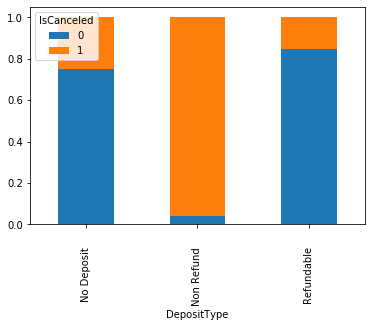

In [36]:
ct =pd.crosstab(df['DepositType'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).plot(kind='bar', stacked=True)

In [37]:
m = df['Agent'].value_counts()[(df['Agent'].value_counts()>400)].index
m

Index(['        240', '       NULL', '        250', '        241',
       '         40', '        314', '        242', '          6',
       '         96', '        243', '        298'],
      dtype='object')

In [41]:
ct =pd.crosstab(df['Agent'],df['IsCanceled']).loc[m,:]
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
96,0.545624,0.454376
240,0.605681,0.394319
242,0.666239,0.333761
298,0.699153,0.300847
250,0.821192,0.178808
314,0.824164,0.175836
NULL,0.826897,0.173103
241,0.862870,0.137130
6,0.902801,0.097199
40,0.918164,0.081836


In [42]:
df1 = df[df['AssignedRoomType'] != df['ReservedRoomType']]

In [43]:
ct =pd.crosstab(df1['ReservedRoomType'],df1['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
ReservedRoomType,,
L,0.800000,0.200000
C,0.934783,0.065217
A,0.947352,0.052648
E,0.959100,0.040900
G,0.967742,0.032258
D,0.968796,0.031204
F,0.975610,0.024390
H,1.000000,0.000000


In [44]:
ct =pd.crosstab(df['AssignedRoomType'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
AssignedRoomType,,
L,0.000000,1.000000
P,0.000000,1.000000
A,0.645254,0.354746
H,0.647472,0.352528
G,0.648678,0.351322
E,0.746719,0.253281
D,0.797950,0.202050
C,0.805330,0.194670
F,0.879977,0.120023


In [45]:
ct =pd.crosstab(df['ArrivalDateMonth'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
ArrivalDateMonth,,
August,0.665509,0.334491
June,0.669294,0.330706
September,0.676319,0.323681
July,0.685983,0.314017
April,0.706567,0.293433
May,0.712279,0.287721
October,0.724895,0.275105
February,0.743796,0.256204
December,0.761707,0.238293


In [46]:
m = df['Company'].value_counts()[(df['Company'].value_counts()>100)].index

In [47]:
pd.crosstab(df['Company'],df['MarketSegment']).loc[m,:]

MarketSegment,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
NULL,177,433,6365,4847,7424,17706
223,0,0,3,779,0,2
281,2,134,2,0,0,0
154,0,130,3,0,0,0


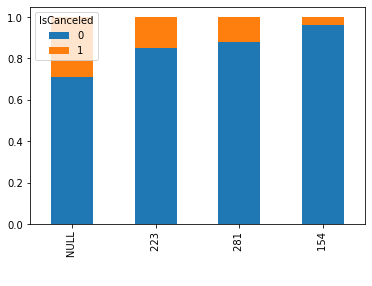

In [48]:
ct = pd.crosstab(df['Company'],df['IsCanceled']).loc[m,:]
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False).plot(kind='bar', stacked=True)

In [49]:
m = df['Country'].value_counts()[(df['Country'].value_counts()>400)].index
m

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU', 'CN', 'NLD', 'USA', 'ITA',
       'BEL', 'CHE', 'BRA'],
      dtype='object')

In [50]:
df['Country'][df['IsCanceled']==1].value_counts()[(df['Country'].value_counts()>400)].index

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU', 'CHE', 'BRA', 'CN', 'ITA',
       'USA', 'BEL', 'NLD'],
      dtype='object')

In [51]:
ct = pd.crosstab(df['Country'],df['IsCanceled']).loc[m,:]
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
PRT,0.578106,0.421894
CHE,0.742529,0.257471
BRA,0.765116,0.234884
ESP,0.784938,0.215062
IRL,0.800554,0.199446
ITA,0.825708,0.174292
USA,0.849687,0.150313
CN,0.864789,0.135211
BEL,0.868304,0.131696
FRA,0.869025,0.130975


In [59]:
categ_col

['ArrivalDateMonth',
 'Meal',
 'Country',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'Agent',
 'Company',
 'CustomerType',
 'ReservationStatus',
 'ReservationStatusDate']

In [53]:
df['TotalStayinNights'] = df['StaysInWeekNights']+df['StaysInWeekendNights']

In [79]:
def adults(x):
    if x == 0:
        return 0
    else:
        return 1

In [80]:
df['Adults/Children'] = df['Children']+df['Babies']

In [81]:
df['Adults/Child'] = df['Adults/Children'].apply(adults)

In [82]:
df['Adults/Child'].unique()

array([0, 1], dtype=int64)

In [83]:
def country(x):
    if x == 'PRT':
        return 'Portugal'
    elif x in ['CHE','BRA','ESP']:
        return 'High'
    elif x in ['IRL','ITA','USA']:
        return 'Medium'
    elif x in ['CN','BEL','FRA','GBR','DEU','NLD']:
        return 'Low'
    else:
        return 'Others'

In [86]:
def agent(x):
    if x == 'NULL':
        return 'No Agent'
    elif x in ['96','240','242','298']:
        return 'High'
    elif x in ['250','314','241']: 
        return 'Medium'
    elif x in ['6','40','243']:
        return 'Low'
    else:
        return 'Others'

In [88]:
def company(x):
    if x == 'NULL':
        return 'No Company'
    elif x in ['223','281','154']:
        return 'Significant'
    else:
        return 'Others'

In [89]:
df['Company'] = df['Company'].apply(company)

In [87]:
df['Agent'] = df['Agent'].apply(agent)

In [84]:
df['Country'] = df['Country'].apply(country)

In [85]:
df['Country'].unique()

array(['Portugal', 'Low', 'Medium', 'High', 'Others'], dtype=object)

In [102]:
df['Assigned/Reserved'] = df.apply(lambda row: (row.AssignedRoomType != row.ReservedRoomType), axis = 1) 

In [107]:
df.drop(['ReservationStatus','ReservationStatusDate','DistributionChannel','Adults/Children','ReservedRoomType'], axis = 1,inplace=True)

In [113]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [111]:
df_final = df.copy()

In [114]:
for col in cat_cols:
    k=df_final[col].value_counts().index[:-1]
    for cat in k:
        name=col+'_'+cat
        df_final[name]=(df_final[col]==cat).astype(int)
    del df_final[col]
    print(col)

ArrivalDateMonth
Meal
Country
MarketSegment
AssignedRoomType
DepositType
Agent
Company
CustomerType


In [132]:
df_final['TotalPreviousBookings'] = df_final['PreviousBookingsNotCanceled']+df_final['PreviousCancellations']

In [151]:
df_final[df_final['LeadTime'] > 500].shape

(26, 61)

In [133]:
df_final.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'TotalStayinNights', 'Adults/Child', 'Assigned/Reserved',
       'ArrivalDateMonth_August', 'ArrivalDateMonth_July',
       'ArrivalDateMonth_April', 'ArrivalDateMonth_May',
       'ArrivalDateMonth_October', 'ArrivalDateMonth_March',
       'ArrivalDateMonth_September', 'ArrivalDateMonth_February',
       'ArrivalDateMonth_June', 'ArrivalDateMonth_December',
       'ArrivalDateMonth_November', 'Meal_BB       ', 'Meal_HB       ',
       'Meal_Undefined', 'Meal_FB       ', 'Country_Portugal', 'Country_Low',
       'Country_High', 'Country_Others', 'MarketSegment_Online TA',
       'MarketSegment_Of

In [134]:
X = df_final.drop('IsCanceled',axis=1)
y = df_final['IsCanceled']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

## Model Building

**Logistic Regression**

In [135]:
logreg = LogisticRegression()

In [136]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

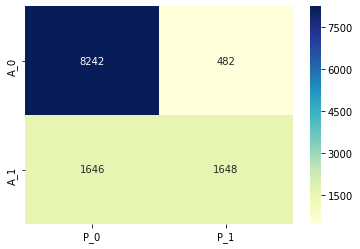

In [137]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_0','P_1'],index=['A_0','A_1'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [138]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      8724
           1       0.77      0.50      0.61      3294

    accuracy                           0.82     12018
   macro avg       0.80      0.72      0.75     12018
weighted avg       0.82      0.82      0.81     12018



**Random Forest Classifier**

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

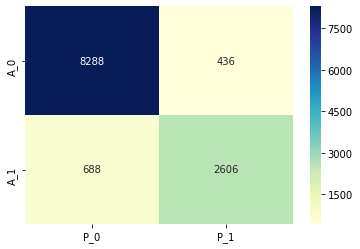

In [141]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_0','P_1'],index=['A_0','A_1'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [142]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      8724
           1       0.86      0.79      0.82      3294

    accuracy                           0.91     12018
   macro avg       0.89      0.87      0.88     12018
weighted avg       0.91      0.91      0.91     12018



* In this problem statement, predicting class 1 is important in avoiding rooms getting vacant whereas predicting class 0 becomes important as it may lead to overbooking on the hotel's side.

Text(0.5, 1.0, 'Visualizing Important Features')

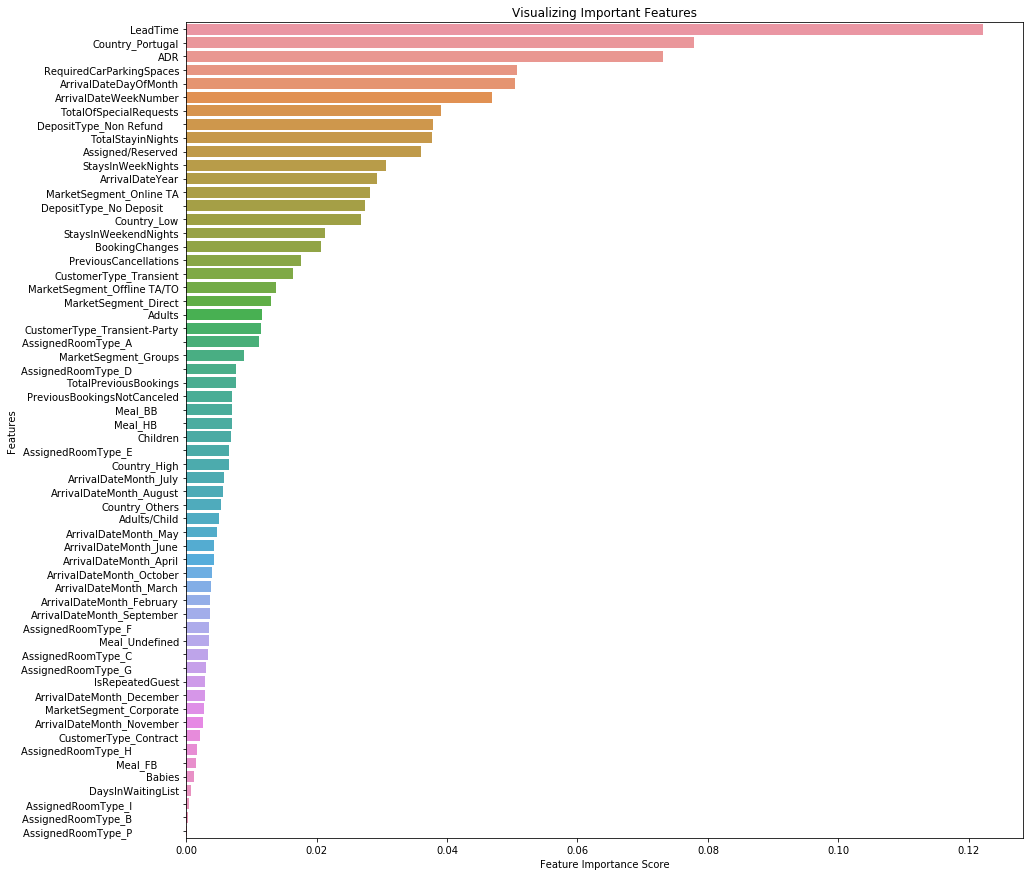

In [143]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")